# <h1>PRUEBA DE CONOCIMIENTO<h1>
Jennifer Vanessa

In [1]:
#importar librerias
import pandas as pd
import numpy as np
from csv import reader
import matplotlib.pyplot as plt
import seaborn as sb

plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('ggplot')

## <h2>Carga y limpieza de datos<h2>
El conjunto de datos a utilizar será el de “Reconocimiento de actividades humanas y transiciones de postura usando Smartphones
Samsung”, disponible en el Repositorio de Machine Learning de UCI:

In [2]:
#CARGA DE LA CABECERA DE LOS FEATURES
cabec= pd.read_csv('Dataset/features.txt', header=None, delimiter=' *, *', engine='python')

cabec.columns = ['Colum']
#CARGA DE DATOS DE TEST
idtest= pd.read_csv('Dataset/subject_id_test.txt', header=None)
idtest.columns = ['id_sub']
id_act_rec= pd.read_csv('Dataset/y_test.txt', header=None)
id_act_rec.columns = ['id_act_reconocida']
data= pd.read_csv('Dataset/X_test.txt', sep=" ", header=None)
data.columns = cabec['Colum'].tolist() 


In [3]:
#Data frame de Test
dftest = pd.concat([idtest, id_act_rec, data], axis=1)
dftest

,id_sub,id_act_reconocida,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,2,5,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,2,5,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,2,5,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,2,5,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,2,5,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,24,2,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,...,0.125445,-0.390349,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104
3158,24,2,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,...,0.150787,-0.336001,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748
3159,24,2,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,...,-0.004765,-0.139894,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527
3160,24,2,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,...,0.013540,-0.224141,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865


In [4]:
#CARGA DE DATOS DE Train
idtrain= pd.read_csv('Dataset/subject_id_train.txt', header=None)
idtrain.columns = ['id_sub']
id_act_rec1= pd.read_csv('Dataset/y_train.txt', header=None)
id_act_rec1.columns = ['id_act_reconocida']
data1= pd.read_csv('Dataset/X_train.txt', sep=" ", header=None)
data1.columns = cabec['Colum'].tolist() 

In [5]:
#Data frame de Train
dftrain = pd.concat([idtrain, id_act_rec1, data1], axis=1)
dftrain

,id_sub,id_act_reconocida,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,1,5,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,1,5,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,1,5,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,1,5,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,1,5,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,30,2,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,30,2,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,30,2,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,30,2,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


### <h3>Descripcion de Dataset<h3>
1. Este conjunto de datos contiene muestras 10929 muestras, cada una
con 561 features/características/atributos/variables, tomadas de 30
sujetos que participaron en el estudio. Los 561 features corresponden
a datos de sensores que caracterizan una actividad.
2. Adicional se asocio el sujeto y la actividad reconocida (la estructura consta con 563 columnas)

In [6]:
#Concatenar dataframes de test y de train
df = pd.concat([dftest, dftrain])
df.shape

(10929, 563)

In [7]:
df.dtypes

id_sub                               int64
id_act_reconocida                    int64
tBodyAcc-Mean-1                    float64
tBodyAcc-Mean-2                    float64
tBodyAcc-Mean-3                    float64
                                    ...   
tBodyGyro-AngleWRTGravity-1        float64
tBodyGyroJerk-AngleWRTGravity-1    float64
tXAxisAcc-AngleWRTGravity-1        float64
tYAxisAcc-AngleWRTGravity-1        float64
tZAxisAcc-AngleWRTGravity-1        float64
Length: 563, dtype: object

## Analisis

3. Muestre estadísticas descriptivas que resuman información sobre los datos.

In [8]:
df.describe()

,id_sub,id_act_reconocida,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
count,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,...,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000,10929.000000
mean,16.138348,3.932839,0.039271,-0.000950,-0.018530,-0.602128,-0.633645,-0.697054,-0.627605,-0.656793,...,0.162057,-0.307343,-0.616570,0.016287,0.019261,0.019060,-0.009669,-0.493295,0.055363,-0.050784
std,8.664537,2.179758,0.101868,0.100673,0.088223,0.431281,0.365457,0.311368,0.407387,0.346456,...,0.232785,0.313980,0.304882,0.330879,0.443168,0.608841,0.484347,0.508506,0.308471,0.266147
min,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,9.000000,2.000000,0.031874,-0.011334,-0.028568,-0.991588,-0.982717,-0.983748,-0.992456,-0.983425,...,0.023593,-0.540997,-0.839609,-0.108841,-0.257741,-0.474747,-0.389165,-0.816662,-0.035500,-0.130120
50%,17.000000,4.000000,0.038939,-0.002859,-0.019558,-0.896268,-0.789857,-0.806782,-0.909166,-0.811565,...,0.172687,-0.343977,-0.701562,0.016339,0.030075,0.012446,-0.009524,-0.711081,0.176461,-0.000182
75%,24.000000,5.000000,0.043908,0.004553,-0.011525,-0.253824,-0.325816,-0.462371,-0.304344,-0.373108,...,0.315790,-0.124693,-0.488104,0.165890,0.315118,0.526513,0.359450,-0.503817,0.249083,0.105739
max,30.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#carga de la descripcion de las actividades reconocidas
actividades = pd.read_csv('Dataset/activity_labels.txt',header=None, sep=" ")
actividades.columns = ['id_act_reconocida', 'des_act', 'tip_act']
actividades['id_act_reconocida']=actividades['id_act_reconocida'].astype(int)
actividades.dtypes



id_act_reconocida     int32
des_act              object
tip_act              object
dtype: object

In [10]:
#dataset de descripcion de actividad reconocida y sujeto
data_des_actividades = pd.merge( actividades, df.loc[:,['id_act_reconocida', 'id_sub']])
data_des_actividades

,id_act_reconocida,des_act,tip_act,id_sub
0,1,WALKING,Dinamica,2
1,1,WALKING,Dinamica,2
2,1,WALKING,Dinamica,2
3,1,WALKING,Dinamica,2
4,1,WALKING,Dinamica,2
...,...,...,...,...
10924,12,LIE_TO_STAND,NaN,28
10925,12,LIE_TO_STAND,NaN,29
10926,12,LIE_TO_STAND,NaN,29
10927,12,LIE_TO_STAND,NaN,30


In [11]:
data_des_actividades.dtypes

id_act_reconocida     int32
des_act              object
tip_act              object
id_sub                int64
dtype: object

### **Datos para cada posible actividad reconocida**

Podemos notar que las actividades que tienen mas informacion son: LAYING, STANDING, SITTING, WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS

<AxesSubplot:xlabel='des_act'>

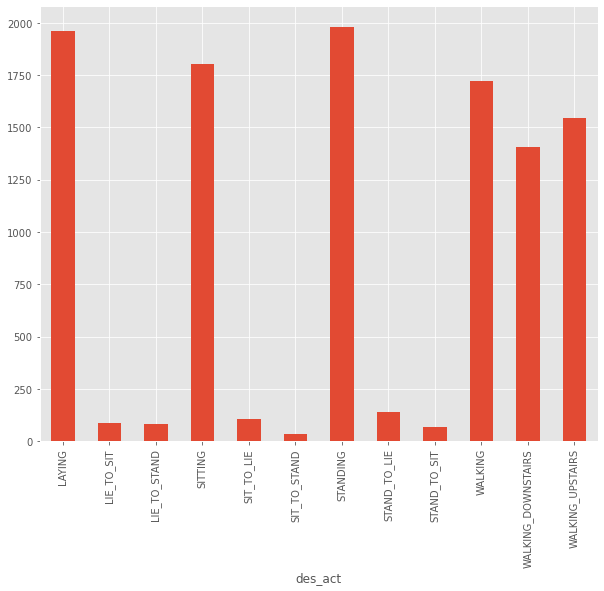

In [12]:
data_des_actividades.groupby('des_act').count()['id_sub'].plot(kind='bar')

In [13]:
#dataset que contenga eL conteo por actividad en donde id_act_reconocida contiene el conteo
conteo_id_act = data_des_actividades.groupby(by=["id_sub",'des_act']).count()
conteo_id_act = conteo_id_act.reset_index()
conteo_id_act

,id_sub,des_act,id_act_reconocida,tip_act
0,1,LAYING,48,48
1,1,LIE_TO_SIT,3,0
2,1,LIE_TO_STAND,3,0
3,1,SITTING,47,47
4,1,SIT_TO_LIE,4,0
...,...,...,...,...
344,30,STAND_TO_LIE,3,0
345,30,STAND_TO_SIT,2,0
346,30,WALKING,65,65
347,30,WALKING_DOWNSTAIRS,62,62


In [14]:
conteo_id_act.dtypes

id_sub                int64
des_act              object
id_act_reconocida     int64
tip_act               int64
dtype: object

In [15]:


#aplicar pivot para mapa de calor
data_des_act_pivot= conteo_id_act.pivot_table(
        index='id_sub', 
         columns='des_act', 
         values='id_act_reconocida'
).reset_index()
data_des_act_pivot.index.name = data_des_act_pivot.columns.name = None
data_des_act_pivot

,id_sub,LAYING,LIE_TO_SIT,LIE_TO_STAND,SITTING,SIT_TO_LIE,SIT_TO_STAND,STANDING,STAND_TO_LIE,STAND_TO_SIT,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
0,1,48.0,3.0,3.0,47.0,4.0,2.0,55.0,6.0,3.0,95.0,49.0,53.0
1,2,49.0,4.0,2.0,46.0,3.0,2.0,55.0,7.0,2.0,59.0,47.0,48.0
2,3,63.0,4.0,2.0,52.0,2.0,1.0,63.0,4.0,2.0,58.0,49.0,59.0
3,4,52.0,4.0,2.0,49.0,4.0,2.0,56.0,7.0,3.0,60.0,45.0,52.0
4,5,51.0,5.0,2.0,43.0,5.0,1.0,57.0,7.0,3.0,56.0,47.0,47.0
5,6,56.0,2.0,3.0,56.0,2.0,1.0,58.0,6.0,2.0,57.0,48.0,51.0
6,7,50.0,1.0,3.0,47.0,4.0,NaN,54.0,4.0,NaN,57.0,47.0,51.0
7,8,55.0,3.0,1.0,45.0,2.0,NaN,57.0,4.0,1.0,48.0,38.0,41.0
8,9,54.0,2.0,2.0,53.0,3.0,NaN,49.0,4.0,1.0,52.0,42.0,49.0
9,10,59.0,1.0,1.0,55.0,2.0,NaN,46.0,3.0,1.0,53.0,38.0,47.0


In [16]:
data_des_act_pivot.set_index('id_sub', inplace=True)

In [17]:
print(data_des_act_pivot.dtypes)

LAYING                float64
LIE_TO_SIT            float64
LIE_TO_STAND          float64
SITTING               float64
SIT_TO_LIE            float64
SIT_TO_STAND          float64
STANDING              float64
STAND_TO_LIE          float64
STAND_TO_SIT          float64
WALKING               float64
WALKING_DOWNSTAIRS    float64
WALKING_UPSTAIRS      float64
dtype: object


#### OBSERVAMOS: 
Lo que se visualiza en el grafico de barras es "que actividad es la mas realizada por usuario" ejemplo:
El sujeto 21 tiene 94 registros en donde se le identifico como actividad reconocida standing

<AxesSubplot:ylabel='id_sub'>

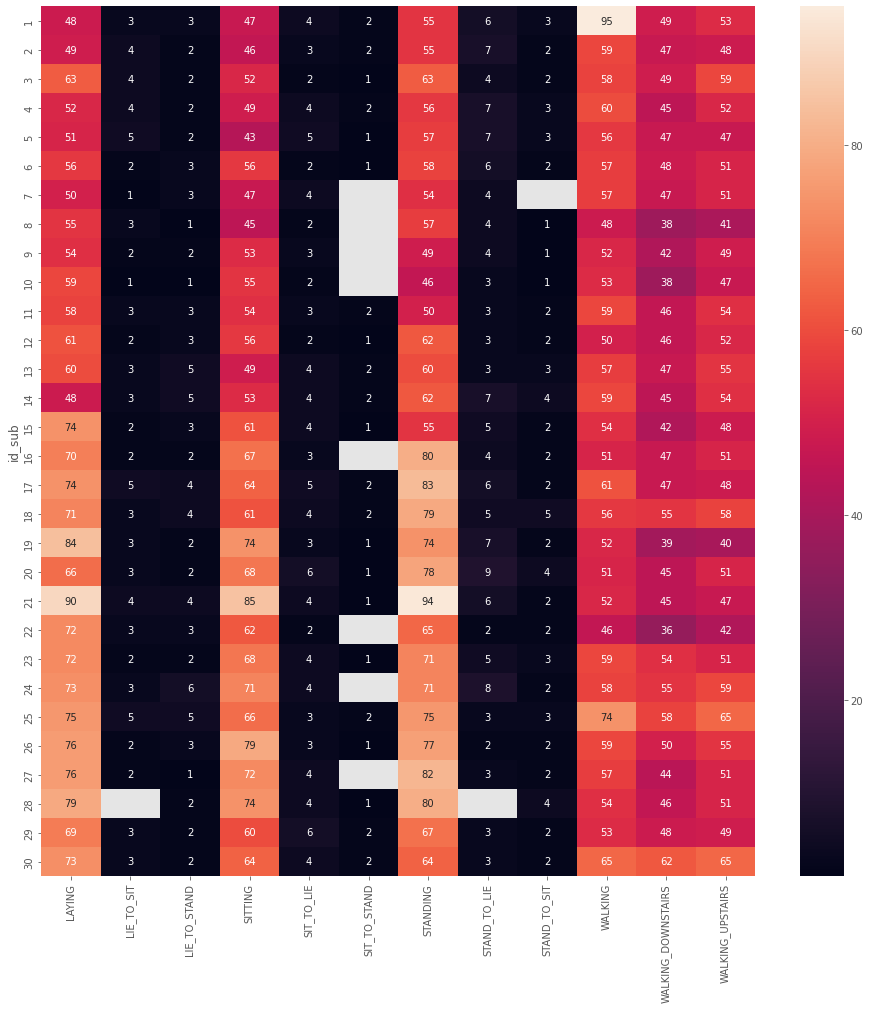

In [18]:
plt.figure(figsize=(16, 16))


sb.heatmap(data_des_act_pivot, annot=True, )

### Actividad reconocida por usuario

5. ¿Cuántas actividades fueron reconocidas para cada sujeto?

In [19]:
# DEL DATASET que cuenta sujetos por actividad agrupamos para conocer cuantas actividad fueron reconocidas por cada usuario
act_id= conteo_id_act.groupby(by=["id_sub"]).count()
act_id =act_id.reset_index()
act_id.loc[:,['id_sub','id_act_reconocida']]

,id_sub,id_act_reconocida
0,1,12
1,2,12
2,3,12
3,4,12
4,5,12
5,6,12
6,7,10
7,8,11
8,9,11
9,10,11


En el siguiente grafico podemos ver la mayoria de los sujetos realizaron las 12 acividades, sin embargo todos sujetos registraron al menos 10 actividades

<AxesSubplot:xlabel='des_act'>

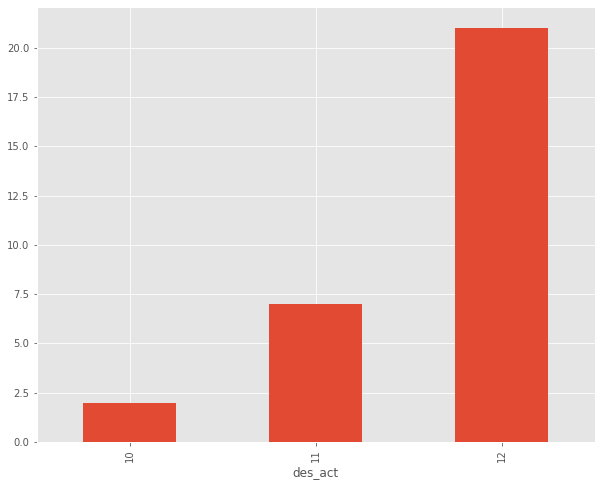

In [20]:
act_id.groupby('des_act').count()['id_sub'].plot(kind='bar')

6. ¿Cuántas y cuales actividades fueron reconocidas para cada sujeto?

En la siguiente tabla tenemos la descripcion de las actividades por cada sujeto, tambien podemos observar el mapa de calor en
donde vemos la actividad registrada por cada sujeto, ejemplo: sujeto 1 registra las 12 actividades, sin embargo el usuario 7 y 28 solo registran 10 actividades.

In [21]:
conteo_id_act

,id_sub,des_act,id_act_reconocida,tip_act
0,1,LAYING,48,48
1,1,LIE_TO_SIT,3,0
2,1,LIE_TO_STAND,3,0
3,1,SITTING,47,47
4,1,SIT_TO_LIE,4,0
...,...,...,...,...
344,30,STAND_TO_LIE,3,0
345,30,STAND_TO_SIT,2,0
346,30,WALKING,65,65
347,30,WALKING_DOWNSTAIRS,62,62


### Nueva estructura valores maximos

Al tener valores normalizados podemos ver que el valor maximo de movimiento de cada sensor es 1

In [22]:
max_df = df.drop(['id_sub','id_act_reconocida'], axis=1) .max().reset_index()
max_df.columns = ['Sensores','Valor_max']
max_df

,Sensores,Valor_max
0,tBodyAcc-Mean-1,1.0
1,tBodyAcc-Mean-2,1.0
2,tBodyAcc-Mean-3,1.0
3,tBodyAcc-STD-1,1.0
4,tBodyAcc-STD-2,1.0
...,...,...
556,tBodyGyro-AngleWRTGravity-1,1.0
557,tBodyGyroJerk-AngleWRTGravity-1,1.0
558,tXAxisAcc-AngleWRTGravity-1,1.0
559,tYAxisAcc-AngleWRTGravity-1,1.0


### Relacion features entre ellos y entre la actividad que fue reconocida

In [23]:
data_feac_acti = df.drop(columns=['id_sub'])
#fe_act['act_reconocida']=fe_act['act_reconocida'].astype(str)
data_feac_acti


,id_act_reconocida,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,5,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,5,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,5,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,5,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,5,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,2,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,2,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,2,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,2,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


En el siguiente grafico de violin observamos la frecuencia 

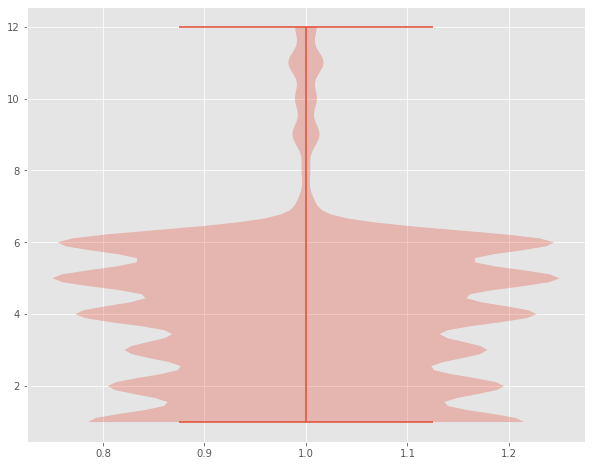

In [24]:
fig, ax = plt.subplots()
ax.violinplot(data_feac_acti['id_act_reconocida'])
plt.show()

### Subconjunto de tipo de actividad
El campo tip_act identifica el tipo de actividad
* Dinamica
* Estatica

In [25]:
tip_actividad = pd.merge(left=actividades,right=df, left_on='id_act_reconocida', right_on='id_act_reconocida')
tip_actividad

,id_act_reconocida,des_act,tip_act,id_sub,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,1,WALKING,Dinamica,2,0.009453,-0.017882,-0.012073,-0.465579,-0.431500,-0.605380,...,0.157278,-0.228429,-0.592430,0.480130,0.619329,0.892920,-0.311693,-0.676330,0.321967,0.014607
1,1,WALKING,Dinamica,2,0.027754,0.010719,0.013980,-0.399548,-0.401696,-0.609843,...,0.303979,-0.506485,-0.809175,0.258529,0.038298,0.904697,-0.421875,-0.670657,0.325710,0.010956
2,1,WALKING,Dinamica,2,0.058286,-0.015370,0.000069,-0.465195,-0.296686,-0.542037,...,0.400887,-0.608732,-0.864026,-0.536458,-0.492501,-0.622143,-0.409633,-0.671747,0.324728,0.007522
3,1,WALKING,Dinamica,2,0.051735,-0.007783,-0.034543,-0.514904,-0.283807,-0.528535,...,0.297574,0.021055,-0.249592,-0.444236,0.224709,-0.836464,-0.603949,-0.672548,0.324330,0.009800
4,1,WALKING,Dinamica,2,0.034310,-0.001662,-0.027300,-0.501027,-0.419315,-0.557812,...,0.356620,-0.311015,-0.648573,0.371001,0.731077,-0.855379,-0.111921,-0.677026,0.321419,0.013186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10924,12,LIE_TO_STAND,NaN,28,0.746785,-0.258070,-0.519078,-0.343989,-0.065411,0.040111,...,0.254824,-0.675959,-0.907671,0.315010,0.623699,-0.329052,0.106091,0.390923,-0.291673,-0.682480
10925,12,LIE_TO_STAND,NaN,29,0.398618,-0.139812,-0.147037,-0.195145,-0.299610,-0.531807,...,0.187575,-0.553766,-0.834919,0.238844,0.370438,-0.501739,0.189808,0.463128,-0.569582,-0.413677
10926,12,LIE_TO_STAND,NaN,29,0.585767,-0.305324,-0.168466,-0.183239,-0.074621,-0.535450,...,-0.031182,-0.253693,-0.708619,0.251845,0.783697,-0.433879,0.520352,0.404091,-0.611599,-0.355108
10927,12,LIE_TO_STAND,NaN,30,0.611205,-0.353520,-0.535708,-0.091433,0.454172,-0.165825,...,-0.053062,-0.362430,-0.775934,0.352469,0.536109,-0.462235,0.448109,0.335489,-0.539954,-0.409436


In [26]:
tipos = tip_actividad.groupby(by=["tip_act",'des_act']).mean()
tipos =tipos.reset_index()

tipos

,tip_act,des_act,id_act_reconocida,id_sub,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,Dinamica,WALKING,1.0,15.272938,0.038640,-0.003610,-0.019729,-0.314712,-0.322391,-0.474158,...,0.177572,-0.093635,-0.411118,0.014918,-0.007011,0.011332,-0.019443,-0.762354,0.218574,0.065906
1,Dinamica,WALKING_DOWNSTAIRS,3.0,15.829424,0.043425,-0.002051,-0.017761,0.100672,-0.264867,-0.413931,...,0.145283,-0.293663,-0.623650,-0.040075,-0.018124,0.204083,-0.076573,-0.781297,0.200099,0.062117
2,Dinamica,WALKING_UPSTAIRS,2.0,15.716969,0.032977,-0.011535,-0.027165,-0.238053,-0.317151,-0.402842,...,0.143619,-0.376003,-0.686177,0.035371,0.006652,-0.129903,0.036432,-0.638691,0.278620,0.128518
3,Estatica,LAYING,6.0,16.696629,0.035202,-0.004116,-0.018376,-0.956065,-0.956945,-0.959195,...,0.211595,-0.350186,-0.653806,0.013283,0.016281,0.016371,0.012680,0.516902,-0.434474,-0.418715
4,Estatica,SITTING,4.0,16.734592,0.037325,0.001574,-0.018078,-0.981618,-0.948915,-0.950655,...,0.216116,-0.389896,-0.681731,0.010489,0.008807,0.016157,-0.037478,-0.708185,0.006545,-0.082191
5,Estatica,STANDING,5.0,16.537140,0.039929,-0.001567,-0.018702,-0.982551,-0.948934,-0.951959,...,0.118150,-0.346389,-0.649902,0.007484,0.015323,0.007275,0.009751,-0.773564,0.210340,0.039377
